In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\milon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='C:/Users/milon/Desktop/nlp6/' 
stopwords_list = path+'bangla_stopwords.txt'


# Dataset Preparation

In [3]:
# Read the data and take only 1000 Reviews
data = pd.read_csv(path+'comment_15000.csv')
print("Total Reviews:",len(data),
      "\nTotal happy Reviews:",len(data[data.Tag =='happy']),
      "\nTotal love Reviews:",len(data[data.Tag=='love']),
      "\nTotal Reviews:",len(data[data.Tag=='fear']),
      "\nTotal anger Reviews:",len(data[data.Tag=='anger']),
      "\nTotal sadness Reviews:",len(data[data.Tag=='sadness']))

Total Reviews: 15538 
Total happy Reviews: 5412 
Total love Reviews: 1315 
Total Reviews: 1951 
Total anger Reviews: 2165 
Total sadness Reviews: 4695


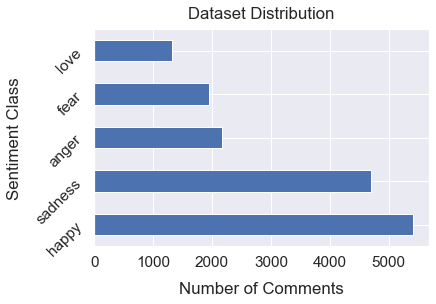

In [4]:
sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [5]:
# print some unprocessed reviews
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
      print(data.Comment[i],'\n','Sentiment:-- ',data.Tag[i],'\n')  

আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি। 
 Sentiment:--  happy 

আমি বলতে চাচ্ছি যে উশুতে এত উচ্চ প্রযুক্তিগত দক্ষতা অর্জনের জন্য সত্যিই কঠোর পরিশ্রম কিছুটা লজ্জা বোধ করছি কিন্তু একরকম অনুপ্রাণিত হয়েছি যখন আমি দেখলাম বাচ্চারা তাদের ক্লান্তি থাকা সত্ত্বেও আন্তরিকভাবে উশু পারফরম্যান্স করছে। 
 Sentiment:--  sadness 

আমি অনুভব করি যে , আমি পথপ্রপাত এবং পাহাড়ে হাঁটা এবং দৌড়ানোর দুর্দান্ত জগতের দরজায় পা রেখেছি। 
 Sentiment:--  happy 

আমি যখন সেই অধ্যায়গুলো পড়ি তখন আমি তার জন্য হতাশ বোধ করি 
 Sentiment:--  anger 

আমি দুই বছর ধরে অস্ট্রেলিয়ার খোলা মাঠে সূর্যালোক ভরা দিন কাটাতে দেখিনি, তারপরে চায়নাটাউনে ডাম্পলিংস এবং একটি বিয়ার বাগানে একটি লেমোনেড দেখে মনে হচ্ছে যেন আমি ব্রান্সউইকের রাস্তায় বৃথা পরিশ্রমের সময় পিছনের উঠোনের বারবিকিউতে অংশ নিয়ে এবং পরিদর্শন করেছিলাম অসি দিবসের জন্য এডিনবার্গ বাগান 
 Sentiment:--  sadness 

আমি এই পুনর্নির্মাণকৃত অফিসে আরও স্বাচ্ছন্দ্য বোধ করছি, আমি এর চমৎকার সুবিধার জন্য অনেক কৃতজ্ঞ

# Data Cleaning

In [6]:
# Data cleaning function
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [7]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি। 
Cleaned:
 আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি  
 Sentiment:--  happy 

Original:
 আমি বলতে চাচ্ছি যে উশুতে এত উচ্চ প্রযুক্তিগত দক্ষতা অর্জনের জন্য সত্যিই কঠোর পরিশ্রম কিছুটা লজ্জা বোধ করছি কিন্তু একরকম অনুপ্রাণিত হয়েছি যখন আমি দেখলাম বাচ্চারা তাদের ক্লান্তি থাকা সত্ত্বেও আন্তরিকভাবে উশু পারফরম্যান্স করছে। 
Cleaned:
 আমি বলতে চাচ্ছি যে উশুতে এত উচ্চ প্রযুক্তিগত দক্ষতা অর্জনের জন্য সত্যিই কঠোর পরিশ্রম কিছুটা লজ্জা বোধ করছি কিন্তু একরকম অনুপ্রাণিত হয়েছি যখন আমি দেখলাম বাচ্চারা তাদের ক্লান্তি থাকা সত্ত্বেও আন্তরিকভাবে উশু পারফরম্যান্স করছে  
 Sentiment:--  sadness 

Original:
 আমি অনুভব করি যে , আমি পথপ্রপাত এবং পাহাড়ে হাঁটা এবং দৌড়ানোর দুর্দান্ত জগতের দরজায় পা রেখেছি। 
Cleaned:
 আমি অনুভব করি যে   আমি পথপ্রপাত এবং পাহাড়ে হাঁটা এবং দৌড়ানোর দুর্দান্ত জগতের দরজায় পা রেখেছি  
 Sentiment:--  happy 

# Preprocessing

## token

In [8]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

# text = "আমি ভাত খাই। সে বাজারে যায়। তিনি কি সত্যিই ভালো মানুষ?"

# word_tokens = bnltk.word_tokenize(text)
# sentence_tokens = bnltk.sentence_tokenize(text)
# print(word_tokens)
# print(sentence_tokens)

data['msg_clean_word_tokenize'] = data['cleaned'].apply(lambda x: bnltk.word_tokenize(x.lower()))
data.head()


C:\Users\milon\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


,Comment,Tag,cleaned,msg_clean_word_tokenize
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশা..."
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আম..."
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, ব..."
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]"


In [10]:
stopwords = nltk.corpus.stopwords.words('bengali')
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean
data['msg_no_sw'] = data['msg_clean_word_tokenize'].apply(lambda x: remove_stopwords(x)) # msg_no_sw = msg no stop word

data.head()

,Comment,Tag,cleaned,msg_clean_word_tokenize,msg_no_sw
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশা...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন..."
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আম...","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, ব...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জ..."
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]"


In [11]:
#import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['msg_stemmed'] = data['msg_no_sw'].apply(lambda x: stemming(x))



In [12]:
data.head(10)

,Comment,Tag,cleaned,msg_clean_word_tokenize,msg_no_sw,msg_stemmed
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশা...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন..."
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আম...","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, ব...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জ...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জ..."
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]"
5,আমি ইদানীং কিছুটা বোঝা বোধ করছি কেন তা ছিল তা ...,sadness,আমি ইদানীং কিছুটা বোঝা বোধ করছি কেন তা ছিল তা ...,"[আমি, ইদানীং, কিছুটা, বোঝা, বোধ, করছি, কেন, তা...","[ইদানীং, কিছুটা, বোঝা, বোধ, করছি, নিশ্চিত, নই]","[ইদানীং, কিছুটা, বোঝা, বোধ, করছি, নিশ্চিত, নই]"
6,আমি একজন কিশোর হিসাবে জীবন সম্পর্কে বিভ্রান্ত ...,fear,আমি একজন কিশোর হিসাবে জীবন সম্পর্কে বিভ্রান্ত ...,"[আমি, একজন, কিশোর, হিসাবে, জীবন, সম্পর্কে, বিভ...","[একজন, কিশোর, জীবন, সম্পর্কে, বিভ্রান্ত, বোধ, ...","[একজন, কিশোর, জীবন, সম্পর্কে, বিভ্রান্ত, বোধ, ..."
7,আমি বছরের পর বছর ধরে পেট্রোনাসের সাথে আছি আমি ...,happy,আমি বছরের পর বছর ধরে পেট্রোনাসের সাথে আছি আমি ...,"[আমি, বছরের, পর, বছর, ধরে, পেট্রোনাসের, সাথে, ...","[বছরের, বছর, পেট্রোনাসের, সাথে, আছি, পেট্রোনাস...","[বছরের, বছর, পেট্রোনাসের, সাথে, আছি, পেট্রোনাস..."
8,আমিও রোমান্টিক বোধ করি।,love,আমিও রোমান্টিক বোধ করি,"[আমিও, রোমান্টিক, বোধ, করি]","[আমিও, রোমান্টিক, বোধ]","[আমিও, রোমান্টিক, বোধ]"
9,"আমি মনে করি যে, আমি কিছু একটা দেখছি সেই কষ্টটা...",sadness,আমি মনে করি যে আমি কিছু একটা দেখছি সেই কষ্টটা...,"[আমি, মনে, করি, যে, আমি, কিছু, একটা, দেখছি, সে...","[একটা, দেখছি, কষ্টটা]","[একটা, দেখছি, কষ্টটা]"


### WordNet

In [13]:
import nltk
wn = nltk.WordNetLemmatizer()  # wn= WordNet lemmatize এর জন্য ব্যবহার করা হয়েছে। 
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [14]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text


data['msg_lemmatized' ] = data['msg_stemmed'].apply(lambda x : lemmatization(x))

data.head(3)  

# in 4th line  goes -> go and lives -> live

,Comment,Tag,cleaned,msg_clean_word_tokenize,msg_no_sw,msg_stemmed,msg_lemmatized
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]","[অপমানিত, বোধ]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশা...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন..."
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আম...","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"


In [15]:
data['cleaned'] = data['msg_lemmatized'].apply(lambda x: ' '.join(x))
data.head()

,Comment,Tag,cleaned,msg_clean_word_tokenize,msg_no_sw,msg_stemmed,msg_lemmatized
0,আমি অপমানিত বোধ করি।,sadness,অপমানিত বোধ,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]","[অপমানিত, বোধ]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে...,sadness,নিরাশ বোধ অভিশপ্ত আশাবাদী শুধুমাত্র যত্নশীল জা...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশা...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্ন..."
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভ...,anger,পোস্ট মিনিট ধরছি লোভী ভুল বোধ করছি,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আম...","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছ...,sadness,অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি জানব সম...,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, ব...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জ...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জ...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জ..."
4,আমি অস্থির বোধ করছি,anger,অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]"


In [16]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),"\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 578 Small Reviews 
Total Reviews: 14960


# Dataset Summary

In [17]:
def data_summary(dataset):
    

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  happy
Number of Documents:5219
Number of Words:46509
Number of Unique Words:9266
Most Frequent Words:

বোধ	2576
অনুভব	1457
করছি	1402
সাথে	588
করেছি	371
সম্পর্কে	353
সত্যিই	327
অনুভূতি	283
ভাল	277
চাই	273

Class Name :  sadness
Number of Documents:4496
Number of Words:38224
Number of Unique Words:7232
Most Frequent Words:

বোধ	2668
করছি	1238
অনুভব	1099
করেছি	379
সাথে	376
সত্যিই	257
সম্পর্কে	256
করছিলাম	249
খারাপ	244
জানি	215

Class Name :  anger
Number of Documents:2076
Number of Words:18283
Number of Unique Words:4799
Most Frequent Words:

বোধ	1176
করছি	527
অনুভব	527
বিরক্ত	360
সাথে	292
করেছি	170
করছিলাম	132
সম্পর্কে	130
চাই	125
সত্যিই	122

Class Name :  fear
Number of Documents:1895
Number of Words:17002
Number of Unique Words:4458
Most Frequent Words:

বোধ	1234
করছি	577
অনুভব	391
ভয়	213
সম্পর্কে	212
সাথে	169
কিছুটা	164
অদ্ভুত	139
করছিলাম	119
করেছি	116

Class Name :  love
Number of Documents:1274
Number of Words:11743
Number of Unique Words:3798
Most Frequent Words:

অ

# Dataset Summary Visualization

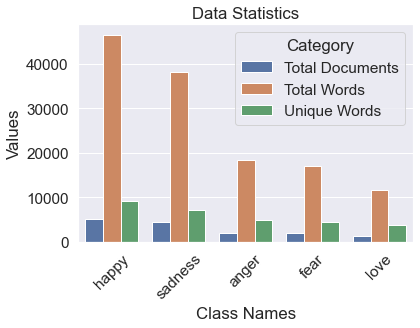

In [18]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

# Comment Lenght Distribution

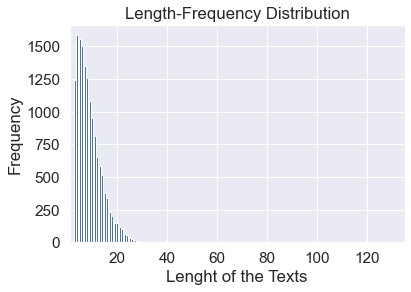

Maximum Length of a review: 39
Minimum Length of a review: 3
Average Length of a reviews: 9.0


In [19]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

# Take only happy=>love and anger=>sadness Class for Model Building

In [20]:
dataset.Tag = dataset.Tag.replace({'happy':'love','anger':'sadness'})
positive = dataset[dataset.Tag == 'love']
negative = dataset[dataset.Tag == 'sadness'][:4000]
dataset = positive.append(negative,ignore_index=True)
dataset.Tag.value_counts()

love       6493
sadness    4000
Name: Tag, dtype: int64

## Label Encoding and Dataset Splitting

In [21]:


def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels




def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [22]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

# **Model Building Using Machine Learning**

## Feature Extraction Using TF-IDF- vectorizer

In [23]:

            
def calc_gram_tfidf(reviews,gram):
 
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [25]:
                                              
def ml_models_defination(): 

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                         

def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                       
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df    

## Model Training

In [26]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    
    
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    
    
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 13482

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10493 
	Training		 9443 
	Test			 1050
Feature Size :======> 75996

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10493 
	Training		 9443 
	Test			 1050
Feature Size :======> 144368

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 10493 
	Training		 9443 
	Test			 1050


## Performance Table

In [29]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  # print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")
  


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     88.10      92.15   75.50     82.99          LR
1     85.14      82.98   77.23     80.00          DT
2     88.48      91.01   77.72     83.85          RF
3     86.48      86.39   76.98     81.41         MNB
4     83.14      78.45   77.48     77.96         KNN
5     84.57      92.31   65.35     76.52  Linear SVM
6     87.33      90.69   74.75     81.95     RBF SVM
Highest Accuracy achieved by RF at = 88.48
Highest F1-Score achieved by RF at = 83.85000000000001
Highest Precision Score achieved by Linear SVM at = 92.31
Highest Recall Score achieved by RF at = 77.72

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     84.29      93.77   63.37     75.63          LR
1     83.62      80.53   75.74     78.06          DT
2     87.90      94.82   72.52     82.19          RF
3     89.71      85.41   88.37     86.86    

**Conclusion:**

---



***From this performance table it can be said that the Trigarm feature combination with Multinomial Naive Bayes classifier provides highest accuray and F1-score value.***

## Performance Visualization

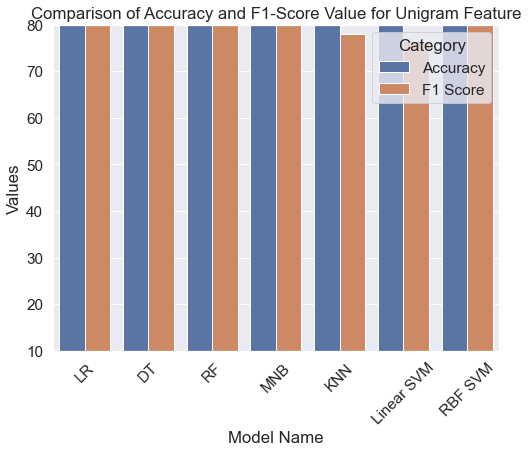

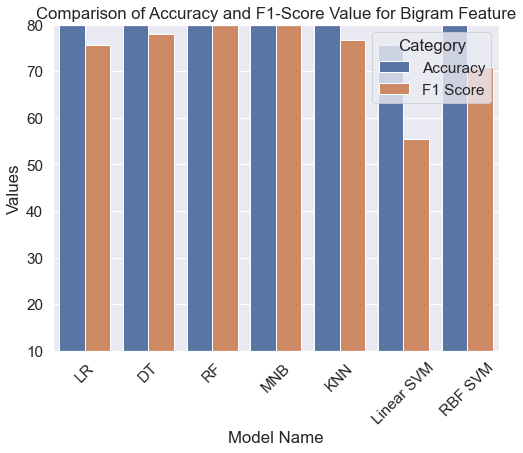

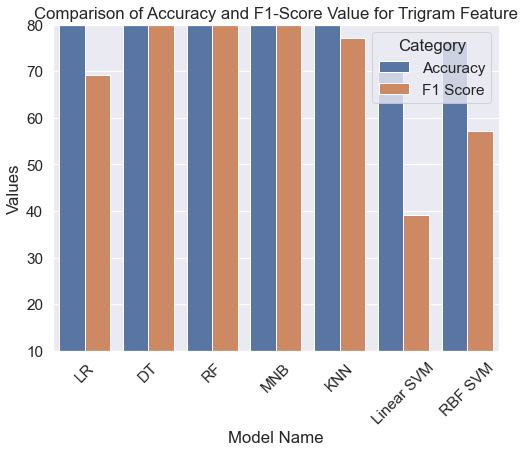

In [28]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);